# Load data

In [1]:
import pandas as pd
import os

In [3]:
dir = os.listdir("Models")
dir.remove(".DS_Store")
dir

['DenseNet', 'EfficientNet', 'GoogLeNet', 'RegNet', 'ResNet18']

In [4]:
data = {}
for model in dir:
    data[model] = {}
for model in dir:
    files = os.listdir(f"Models/{model}")
    for filename in files:
        if 'history.csv' in filename:
            data[model]["history"] = pd.read_csv(f"Models/{model}/{filename}")
        if "result.csv" in filename:
            data[model]["result"] = pd.read_csv(f"Models/{model}/{filename}")

# Plot ACC bar

In [5]:
values_chart = []
for value in data.values():
    values_chart.append(value['result'].T.iloc[-1].to_list())
    

In [6]:
plot_result_df = pd.DataFrame(values_chart,columns=data['DenseNet']['result'].T.iloc[0].to_list(),index=data.keys())
plot_result_df = plot_result_df.reset_index()
plot_result_df = pd.melt(plot_result_df, "index", ["Train",'Validation','Test'])
plot_result_df

,index,variable,value
0,DenseNet,Train,89.180000
1,EfficientNet,Train,82.970000
2,GoogLeNet,Train,85.730000
3,RegNet,Train,91.240000
4,ResNet18,Train,94.790000
5,DenseNet,Validation,70.710000
6,EfficientNet,Validation,71.890000
7,GoogLeNet,Validation,73.240000
8,RegNet,Validation,69.370000
9,ResNet18,Validation,90.340000


In [26]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(plot_result_df, x="index", y="value",
             color='variable', barmode='group',
             height=400,text_auto='.2f')

# Update layout with title and description
fig.update_layout(
    title_text="Accuracy of 5 Models",
    title_x=0.5,  # Center the title
    title_font=dict(size=18),
    xaxis=dict(title='Models'),
    yaxis=dict(title='Accuracy %'),
    annotations=[
        dict(
            text="Compare accuracy each model on training, validation and test set.",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=1.1,
            font=dict(size=12),
        )
    ]
)

fig.update_yaxes(range=[0, 100])

# Show the figure
fig.show()

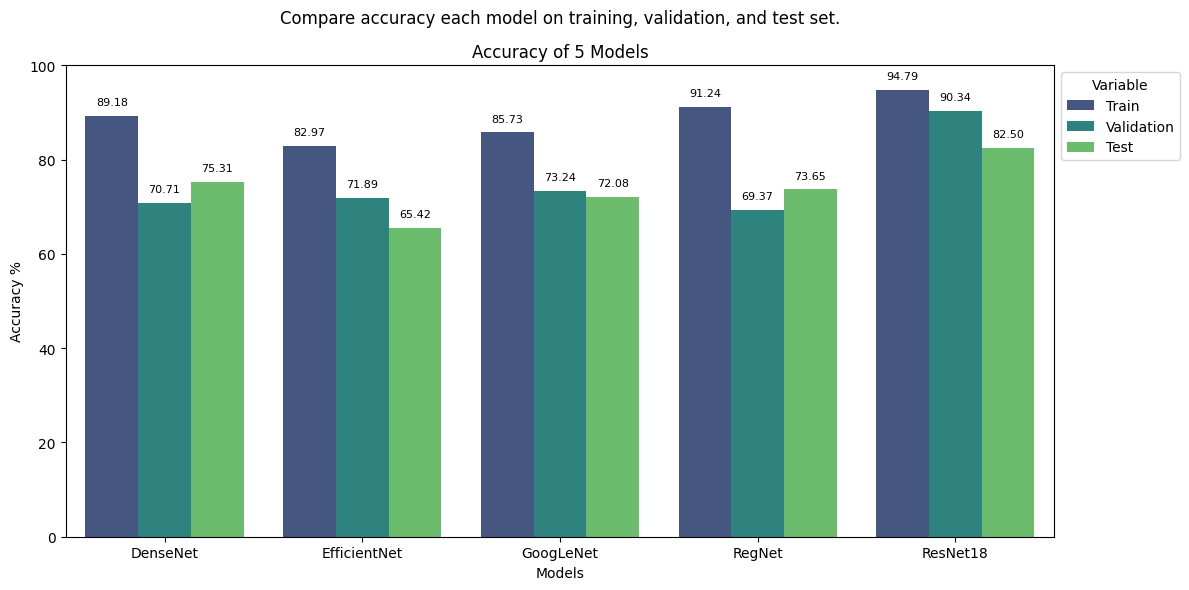

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(12, 6))

# Use Seaborn's barplot function
sns.barplot(data=plot_result_df, x="index", y="value", hue="variable", palette="viridis")

# Add value annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title("Accuracy of 5 Models")
plt.xlabel("Models")
plt.ylabel("Accuracy %")
plt.ylim(0, 100)

plt.legend(title="Variable", loc="upper left", bbox_to_anchor=(1, 1))

plt.annotate(
    "Compare accuracy each model on training, validation, and test set.",
    xy=(0.5, 1.1),
    xycoords="axes fraction",
    ha="center",
    va="center",
    fontsize=12,
)
plt.tight_layout()
plt.show()

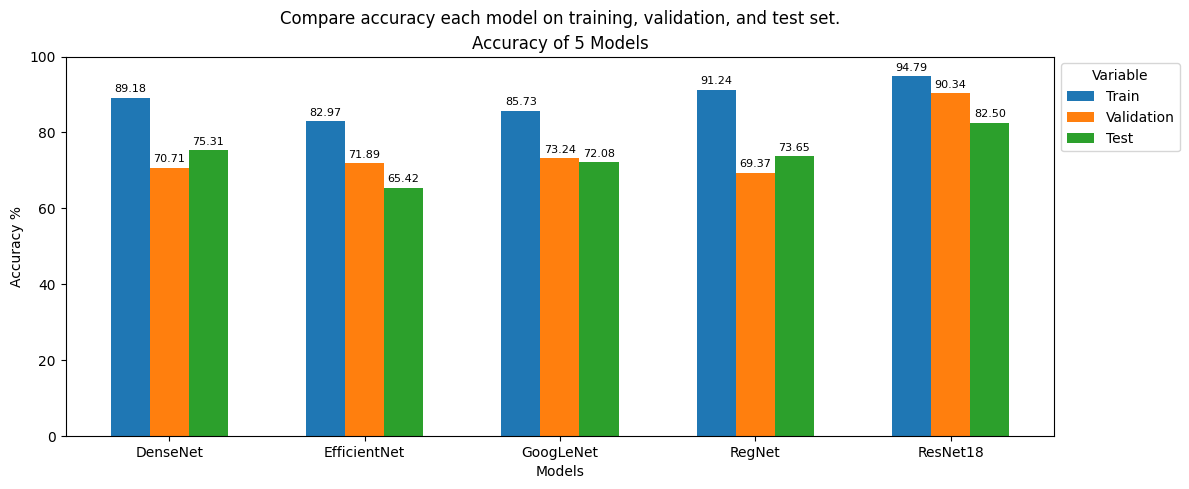

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df
fig, ax = plt.subplots(figsize=(12, 5))

# Create numerical x values for each 'index' category
x_values = np.arange(len(plot_result_df['index'].unique()))

bar_width = 0.2  # Adjust as needed

# Plot bars for each 'variable' category
for i, variable in enumerate(plot_result_df['variable'].unique()):
    subset = plot_result_df[plot_result_df['variable'] == variable]
    ax.bar(x_values + i * bar_width, subset['value'], width=bar_width, label=variable)

# Add value annotations on top of each bar
for i, value in enumerate(plot_result_df['value']):
    x_position = i % len(x_values) + (plot_result_df['variable'].unique().tolist().index(plot_result_df.loc[i, 'variable']) * bar_width)
    ax.text(x_position, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

ax.set_xticks(x_values + bar_width * (len(plot_result_df['variable'].unique()) - 1) / 2)
ax.set_xticklabels(plot_result_df['index'].unique())
ax.set_ylim(0, 100)

ax.set_title("Accuracy of 5 Models")
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy %")
ax.legend(title="Variable", loc="upper left",bbox_to_anchor=(1, 1), ncol=1)

plt.annotate(
    "Compare accuracy each model on training, validation, and test set.",
    xy=(0.5, 1.1),
    xycoords="axes fraction",
    ha="center",
    va="center",
    fontsize=12,
)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Plot ACC history

In [8]:
values_line = []
for value in data.values():
    values_line.append(value['history'].T.iloc[-2].to_list())

In [9]:
plot_line_df = pd.DataFrame(values_line,index=data.keys())
plot_line_df = plot_line_df.reset_index()
# plot_line_df = pd.melt(plot_line_df, "index", ["Train",'Validation','Test'])
plot_line_df = plot_line_df.T
plot_line_df.columns = plot_line_df.iloc[0]
plot_line_df = plot_line_df[1:]

In [10]:
fig = px.line(plot_line_df, x=plot_line_df.index, y=["DenseNet","GoogLeNet","ResNet18","EfficientNet","RegNet"])

# Update layout with title and description
fig.update_layout(
    title_text="Accuracy of 5 Models",
    title_x=0.5,  # Center the title
    title_font=dict(size=18),
    xaxis=dict(title='Epoch'),
    yaxis=dict(title='Accuracy %'),
    annotations=[
        dict(
            text="Compare accuracy history of each model on training set.",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=1.1,
            font=dict(size=12),
        )
    ]
)

# Show the figure
fig.show()